<a href="https://colab.research.google.com/github/mathuscm/PJ4_Analise_Combustivel/blob/main/Arquivo%20principal%20e%20datasets/projetoemgrupo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Relatório da Agência Nacional de Petróleo, Gás Natural e Biocombustíveis (ANP)**

Faremos um levantamento sobre os preços dos combustíveis nos meses de "maio e junho de 2023" para a Agência Nacional de Petróleo, Gás Natural e Biocombustíveis (ANP) nas diferentes regiões do Brasil, os dados foram coletados do site  (https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis) para fazer uma análise exploratória relacionada à série histórica de preço de venda da gasolina e do etanol.

- Análise deve responder às seguintes perguntas:

- 1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou alta?
- 2. Qual o preço médio da gasolina e do etanol nesses dois meses?
- 3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?
- Pergunta extra 1. O que justifica a média dos preços dos estados do norte serem mais caras que o restante das regiões?
- 4. Qual o preço médio da gasolina e do etanol por estado?
- 5. Qual o município que possui o menor preço para a gasolina e para o etanol?
- 6. Qual o município que possui o maior preço para a gasolina e para o etanol?
- 7. Qual a região que possui o maior valor médio da gasolina?
- 8. Qual a região que possui o menor valor médio do etanol?
- 9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?
- 10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?
- Pergunta extra 2. Qual a Bandeira que possui o maior preço para a gasolina e para o etanol?

Acompanhar os preços dos combustíveis é de grande importância por que afeta o dia a dia do cidadão brasileiro
como alimentos, preços de viagens, fretes entre outros fatores.

In [1]:
# Importando as bibliotecas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Abrir arquivos dos dados dos preços da gasolina e etanol mês de maio.
precos_gaso_et5 = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-05.csv', sep=';')
display(precos_gaso_et5)


,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,ETANOL,01/05/2023,"3,79",NaN,R$ / litro,BRANCA
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,GASOLINA,01/05/2023,"4,69",NaN,R$ / litro,BRANCA
2,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,ETANOL,01/05/2023,"5,49",NaN,R$ / litro,IPIRANGA
3,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,GASOLINA ADITIVADA,01/05/2023,"6,97",NaN,R$ / litro,IPIRANGA
4,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,GASOLINA,01/05/2023,"6,97",NaN,R$ / litro,IPIRANGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58485,SE,SP,VALINHOS,AUTO POSTO MUNICIPALDE ANDRADAS LTDA,44.059.126/0001-07,RODOVIA MUNICIPAL DOS ANDRADAS,3294,NaN,JARDIM LORENA,13277-650,ETANOL,31/05/2023,"3,49",NaN,R$ / litro,IPIRANGA
58486,SE,SP,VALINHOS,AUTO POSTO MUNICIPALDE ANDRADAS LTDA,44.059.126/0001-07,RODOVIA MUNICIPAL DOS ANDRADAS,3294,NaN,JARDIM LORENA,13277-650,GASOLINA ADITIVADA,31/05/2023,"4,99",NaN,R$ / litro,IPIRANGA
58487,SE,SP,VALINHOS,AUTO POSTO MUNICIPALDE ANDRADAS LTDA,44.059.126/0001-07,RODOVIA MUNICIPAL DOS ANDRADAS,3294,NaN,JARDIM LORENA,13277-650,GASOLINA,31/05/2023,"4,69",NaN,R$ / litro,IPIRANGA
58488,SE,SP,PIRASSUNUNGA,AUTO POSTO PADRE ANTONI LTDA,45.224.849/0001-87,AVENIDA PADRE ANTONIO VANN ESS,1144,NaN,CENTRO,13630-025,ETANOL,31/05/2023,"3,49",NaN,R$ / litro,IPIRANGA


In [3]:
# Filtrar dados da gasolina e etanol do mês de junho
precos_gaso_et6 = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-06.csv', sep=';')
display(precos_gaso_et6)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,BA,IRECE,IRECE DERIVADOS DE PETROLEO LTDA,09.186.976/0001-75,PRACA AIRTON SENNA,285,TERREO,CENTRO,44900-000,ETANOL,01/06/2023,"4,31",NaN,R$ / litro,VIBRA ENERGIA
1,NE,BA,IRECE,IRECE DERIVADOS DE PETROLEO LTDA,09.186.976/0001-75,PRACA AIRTON SENNA,285,TERREO,CENTRO,44900-000,GASOLINA,01/06/2023,"5,39",NaN,R$ / litro,VIBRA ENERGIA
2,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,NaN,CENTRO,43700-000,ETANOL,01/06/2023,"4,19",NaN,R$ / litro,VIBRA ENERGIA
3,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,NaN,CENTRO,43700-000,GASOLINA ADITIVADA,01/06/2023,"5,36",NaN,R$ / litro,VIBRA ENERGIA
4,NE,BA,SIMOES FILHO,CORESFIL COMERCIO REVENDEDOR DE COMBUSTIVEIS LTDA,13.018.536/0003-48,AVENIDA WASHINGTON LUIZ,169,NaN,CENTRO,43700-000,GASOLINA,01/06/2023,"5,29",NaN,R$ / litro,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49036,NE,BA,CAMACARI,POSTO DE COMBUSTIVEIS BUSCA VIDA LTDA,28.315.993/0001-00,RUA C,27,LOTEAMENTO JARDIM FL AMBOYANTS,VILA DE ABRANTES,42840-000,GASOLINA,30/06/2023,"5,64",NaN,R$ / litro,BRANCA
49037,NE,BA,CAMACARI,YEMANJA COMERCIO DE DERIVADOS DE PETROLEO E SE...,04.909.369/0002-53,ESTRADA DA CASCALHEIRA,S/N,BA 531 KM 3 5 ...,PARQUE REAL SERRA VERDE,42813-080,ETANOL,30/06/2023,"4,44",NaN,R$ / litro,BRANCA
49038,NE,BA,CAMACARI,YEMANJA COMERCIO DE DERIVADOS DE PETROLEO E SE...,04.909.369/0002-53,ESTRADA DA CASCALHEIRA,S/N,BA 531 KM 3 5 ...,PARQUE REAL SERRA VERDE,42813-080,GASOLINA ADITIVADA,30/06/2023,"5,64",NaN,R$ / litro,BRANCA
49039,NE,BA,CAMACARI,YEMANJA COMERCIO DE DERIVADOS DE PETROLEO E SE...,04.909.369/0002-53,ESTRADA DA CASCALHEIRA,S/N,BA 531 KM 3 5 ...,PARQUE REAL SERRA VERDE,42813-080,GASOLINA,30/06/2023,"5,64",NaN,R$ / litro,BRANCA


## Realizando tratamento de dados, verificando valores nulos, removendo colunas que não serão úteis à análise

In [4]:
# transformando strings em números flutuantes
precos_gaso_et5['Valor de Venda'] = precos_gaso_et5['Valor de Venda'].str.replace(',', '.').astype(float)
precos_gaso_et6['Valor de Venda'] = precos_gaso_et6['Valor de Venda'].str.replace(',', '.').astype(float)

In [5]:
# Concatenar as tabelas e juntas os indices
tabelas_preco_gasol_etan = pd.concat([precos_gaso_et5, precos_gaso_et6], ignore_index=True)

In [6]:
# analisando a quantidades de números nan por colunas
valores_nulos = tabelas_preco_gasol_etan.isna().sum()
valores_nulos

Regiao - Sigla            0
Estado - Sigla            0
Municipio                 0
Revenda                   0
CNPJ da Revenda           0
Nome da Rua               0
Numero Rua               45
Complemento           83683
Bairro                  226
Cep                       0
Produto                   0
Data da Coleta            0
Valor de Venda            0
Valor de Compra      107531
Unidade de Medida         0
Bandeira                  0
dtype: int64

- Identifica linhas com valores nulos assim podemos colocar outros valores ou eliminar a coluna se não for alterar os dados

In [7]:
# Deletando colunas usando o drop para fazer a limpeza adequada da tabela.
tabelas_preco_gasol_etan2 = tabelas_preco_gasol_etan.drop(columns=['Revenda','CNPJ da Revenda','Valor de Compra','Nome da Rua','Numero Rua','Complemento','Cep','Unidade de Medida'])


- Foram deletados algumas colunas que não possui muito impacto na resposta do relatório para os preços dos combustíveis em diferentes regiões, alguns valores nulos muito grande e outras que não possui um foco para as pergunta do relatório


In [8]:
# Renomear nomes das colunas
tabelas_preco_gasol_etan3 = tabelas_preco_gasol_etan2.rename(columns=lambda x: x.replace('Regiao - Sigla', 'Sigla_Regiao').replace('Estado - Sigla','Sigla_Estado').replace('Data da Coleta','Data_da_Coleta').replace('Valor de Venda','Valor_de_Venda',))
tabelas_preco_gasol_etan3

,Sigla_Regiao,Sigla_Estado,Municipio,Bairro,Produto,Data_da_Coleta,Valor_de_Venda,Bandeira
0,SE,SP,SOROCABA,JARDIM ZULMIRA,ETANOL,01/05/2023,3.79,BRANCA
1,SE,SP,SOROCABA,JARDIM ZULMIRA,GASOLINA,01/05/2023,4.69,BRANCA
2,N,AC,CRUZEIRO DO SUL,COPACABANA,ETANOL,01/05/2023,5.49,IPIRANGA
3,N,AC,CRUZEIRO DO SUL,COPACABANA,GASOLINA ADITIVADA,01/05/2023,6.97,IPIRANGA
4,N,AC,CRUZEIRO DO SUL,COPACABANA,GASOLINA,01/05/2023,6.97,IPIRANGA
...,...,...,...,...,...,...,...,...
107526,NE,BA,CAMACARI,VILA DE ABRANTES,GASOLINA,30/06/2023,5.64,BRANCA
107527,NE,BA,CAMACARI,PARQUE REAL SERRA VERDE,ETANOL,30/06/2023,4.44,BRANCA
107528,NE,BA,CAMACARI,PARQUE REAL SERRA VERDE,GASOLINA ADITIVADA,30/06/2023,5.64,BRANCA
107529,NE,BA,CAMACARI,PARQUE REAL SERRA VERDE,GASOLINA,30/06/2023,5.64,BRANCA


<font size=6> 1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou Alta?


- Calculando a média diária dos combustíveis do mês de maio

In [9]:
## Adicionar dias da semana que faltam e preencher os valores com a média de cada combustível
# Filtrar os dados e criar dicionário
df_gasolina = precos_gaso_et5[precos_gaso_et5['Produto'] == 'GASOLINA']
df_gasolina_adtv = precos_gaso_et5[precos_gaso_et5['Produto'] == 'GASOLINA ADITIVADA']
df_etanol = precos_gaso_et5[precos_gaso_et5['Produto'] == 'ETANOL']

produto_dfs = {
    'GASOLINA': df_gasolina,
    'GASOLINA ADITIVADA': df_gasolina_adtv,
    'ETANOL': df_etanol
}

# adicionar datas que faltam
datas_faltantes = ['06/05/2023', '07/05/2023', '13/05/2023', '14/05/2023',
                   '20/05/2023', '21/05/2023', '27/05/2023', '28/05/2023']

# Converter as datas para datetime
datas_faltantes = pd.to_datetime(datas_faltantes, format='%d/%m/%Y')

# Calcular Valor de Venda
media_valores = {}
for produto, df in produto_dfs.items():
    media_valores[produto] = df.groupby('Data da Coleta')['Valor de Venda'].mean().round(2)

# DataFrame com as médias dos combustíveis, adicionar datas faltantes e preencher valores nulos com as médias
df_media_valores = pd.DataFrame(media_valores)
df_media_valores.index = pd.to_datetime(df_media_valores.index, format='%d/%m/%Y')
df_final = pd.concat([df_media_valores, pd.DataFrame(index=datas_faltantes)], axis=0)
df_final = df_final.sort_index()
df_final.fillna(df_final.mean().round(2), inplace=True)

# Formatar as datas no formato "dia-mes-ano"
df_final.index = df_final.index.strftime('%d-%m-%Y')


- Calculando a média diária dos combustíveis do mês de Junho

In [10]:
## Adicionar dias da semana que faltam e preencher os valores com a média de cada combustível
# Filtrar os dados e criar dicionário
df_gasolina2 = precos_gaso_et6[precos_gaso_et6['Produto'] == 'GASOLINA']
df_gasolina_adtv2 = precos_gaso_et6[precos_gaso_et6['Produto'] == 'GASOLINA ADITIVADA']
df_etanol2 = precos_gaso_et6[precos_gaso_et6['Produto'] == 'ETANOL']

produto_dfs_junho = {
    'GASOLINA': df_gasolina2,
    'GASOLINA ADITIVADA': df_gasolina_adtv2,
    'ETANOL': df_etanol2
}

# adicionar datas que faltam
datas_faltantes2 = ['03/06/2023', '04/06/2023', '10/06/2023', '11/06/2023',
                   '17/06/2023', '18/06/2023', '24/06/2023', '25/06/2023']

# Converter as datas para datetime
datas_faltantes2 = pd.to_datetime(datas_faltantes2, format='%d/%m/%Y')

# Calcular Valor de Venda
media_valores_junho = {}
for produto2, df2 in produto_dfs_junho.items():
    media_valores_junho[produto2] = df2.groupby('Data da Coleta')['Valor de Venda'].mean().round(2)

# DataFrame com as médias dos combustíveis, adicionar datas faltantes e preencher valores nulos com as médias
df_media_valores2 = pd.DataFrame(media_valores_junho)
df_media_valores2.index = pd.to_datetime(df_media_valores2.index, format='%d/%m/%Y')
df_final2 = pd.concat([df_media_valores2, pd.DataFrame(index=datas_faltantes2)], axis=0)
df_final2 = df_final2.sort_index()
df_final2.fillna(df_final2.mean().round(2), inplace=True)

# Formatar as datas no formato "dia-mes-ano"
df_final2.index = df_final2.index.strftime('%d-%m-%Y')

In [11]:
# concatenando os dois dataframes
dfs_concatenados = pd.concat([df_final, df_final2])
dfs_concatenados

,GASOLINA,GASOLINA ADITIVADA,ETANOL
01-05-2023,5.49,5.67,4.28
02-05-2023,5.53,5.72,4.31
03-05-2023,5.55,5.73,4.35
04-05-2023,5.51,5.68,4.26
05-05-2023,5.52,5.71,4.24
...,...,...,...
26-06-2023,5.34,5.54,3.96
27-06-2023,5.37,5.55,4.01
28-06-2023,5.37,5.55,4.02
29-06-2023,5.46,5.62,3.97


<ipython-input-12-0a594b801fce>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


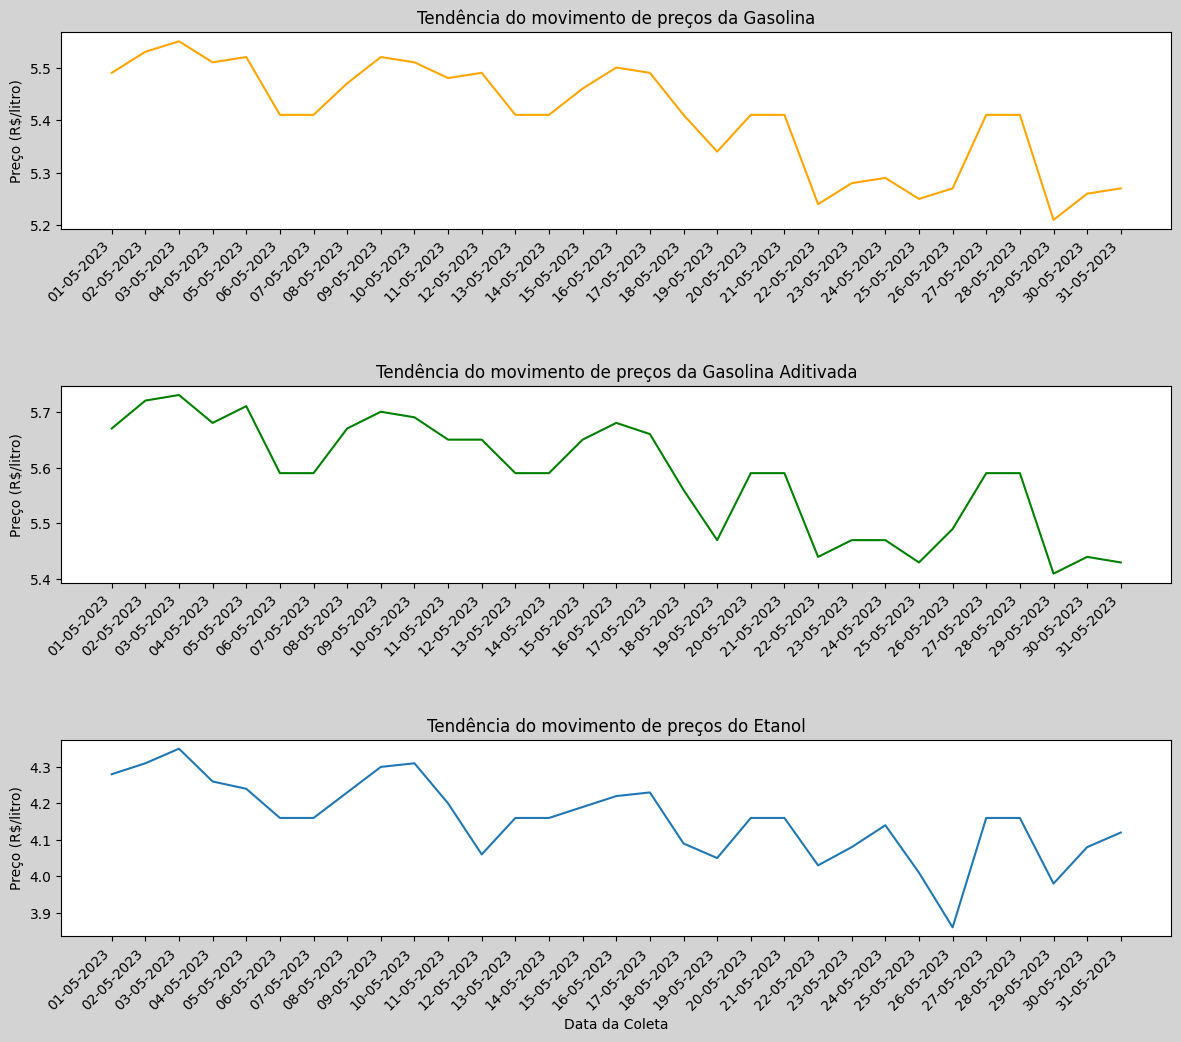

In [12]:
# Criar os subplots emparelhando os gráficos
fig, axes = plt.subplots(nrows=3, figsize=(12, 10))

# Gráfico Gasolina
sns.lineplot(data=df_final, x=df_final.index, y='GASOLINA', ax=axes[0], color='orange')
axes[0].set_title('Tendência do movimento de preços da Gasolina')
axes[0].set_ylabel('Preço (R$/litro)')

# Gráfico Gasolina Aditivada
sns.lineplot(data=df_final, x=df_final.index, y='GASOLINA ADITIVADA', ax=axes[1], color='green')
axes[1].set_title('Tendência do movimento de preços da Gasolina Aditivada')
axes[1].set_ylabel('Preço (R$/litro)')

# Gráfico Etanol
sns.lineplot(data=df_final, x=df_final.index, y='ETANOL', ax=axes[2])
axes[2].set_title('Tendência do movimento de preços do Etanol')
axes[2].set_xlabel('Data da Coleta')
axes[2].set_ylabel('Preço (R$/litro)')

plt.tight_layout()

# Rotacionar rótulos de data
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Espaçamento
plt.subplots_adjust(hspace=0.8)

# Alterar a cor do fundo
fig.patch.set_facecolor('lightgray')

# Mostrar os gráficos
plt.xticks(df_final.index, rotation=45)
plt.show()



<ipython-input-13-70a15f5a1259>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


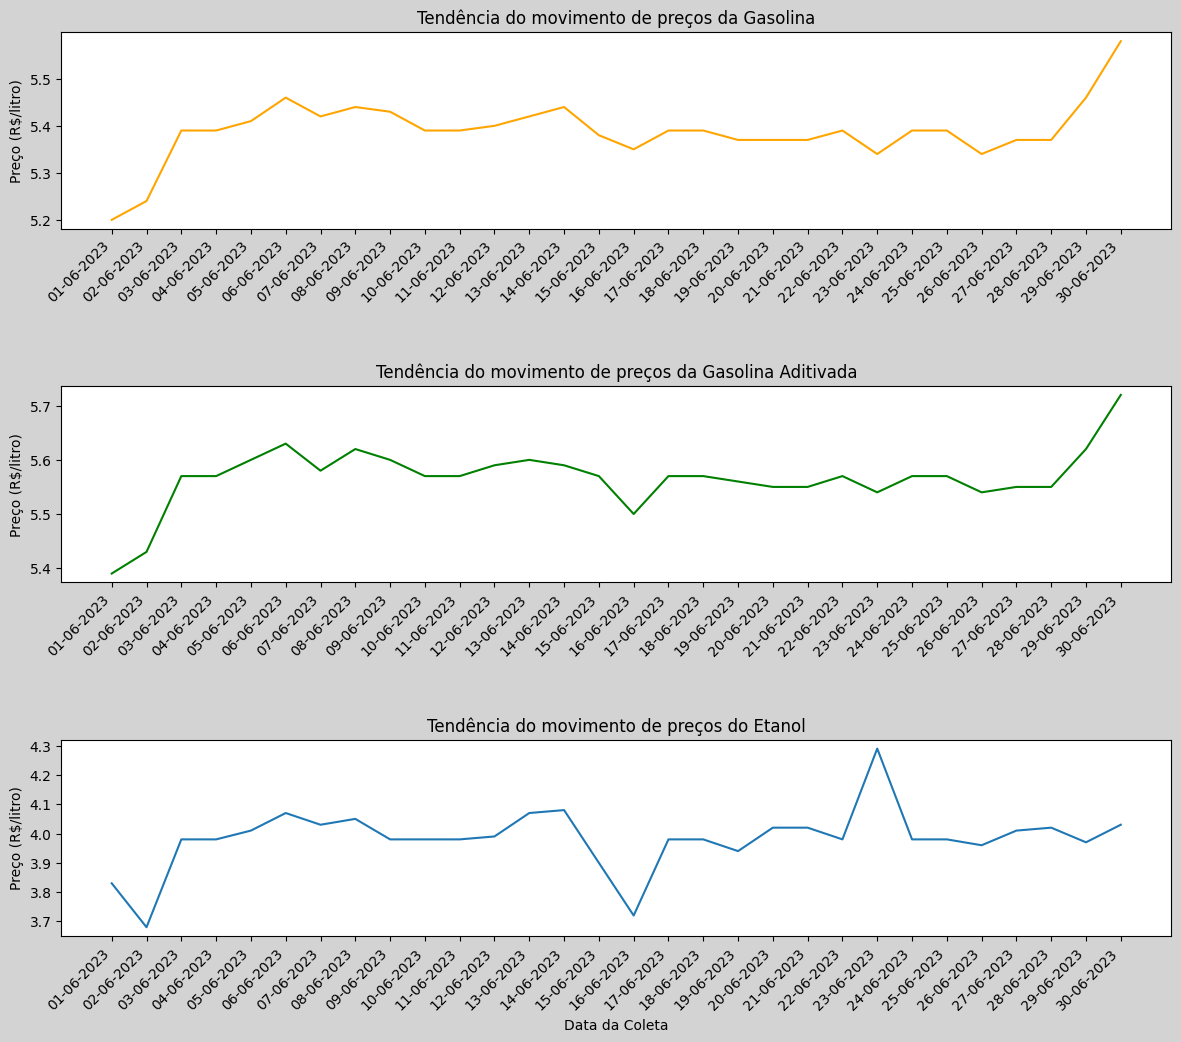

In [13]:
# Criar os subplots emparelhando os gráficos
fig, axes = plt.subplots(nrows=3, figsize=(12, 10))

# Gráfico Gasolina
sns.lineplot(data=df_final2, x=df_final2.index, y='GASOLINA', ax=axes[0], color='orange')
axes[0].set_title('Tendência do movimento de preços da Gasolina')
axes[0].set_ylabel('Preço (R$/litro)')

# Gráfico Gasolina Aditivada
sns.lineplot(data=df_final2, x=df_final2.index, y='GASOLINA ADITIVADA', ax=axes[1], color='green')
axes[1].set_title('Tendência do movimento de preços da Gasolina Aditivada')
axes[1].set_ylabel('Preço (R$/litro)')

# Gráfico Etanol
sns.lineplot(data=df_final2, x=df_final2.index, y='ETANOL', ax=axes[2])
axes[2].set_title('Tendência do movimento de preços do Etanol')
axes[2].set_xlabel('Data da Coleta')
axes[2].set_ylabel('Preço (R$/litro)')

plt.tight_layout()

# Rotacionar rótulos de data
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Espaçamento
plt.subplots_adjust(hspace=0.8)

# Alterar a cor do fundo
fig.patch.set_facecolor('lightgray')

# Mostrar os gráficos
plt.xticks(df_final2.index, rotation=45)
plt.show()

In [14]:
#mostra estatísticas descritivas para o valores de vendas
df.describe()

,Valor de Venda,Valor de Compra
count,18997.000000,0.0
mean,4.178726,NaN
std,0.446702,NaN
min,2.990000,NaN
25%,3.870000,NaN
50%,4.100000,NaN
75%,4.490000,NaN
max,6.500000,NaN


- Estatísticas descritivas pode fornecer insights sobre os conjuntos de dados, ajuda a entender rapidamente a distribuição, variação e a tendência para ter uma ideia rápida do que esta no dataset

In [15]:
# simplificando o nome do dataframe
df = tabelas_preco_gasol_etan3

<Axes: >

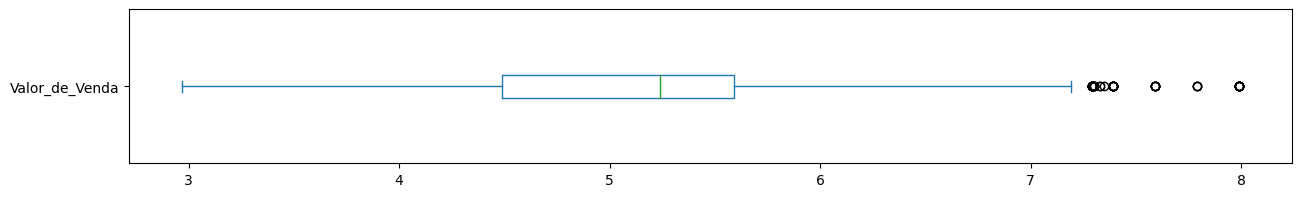

In [16]:
# verificar outliers
df['Valor_de_Venda'].plot.box(vert=False, figsize=(15,2))

- Verificar possíveis outliers isso ajuda a ver se não a valores muito fora da curva que possa modificar as médias reais dos dados devido os outlires ser poucos valores e serem muito alto ou muito baixos

<font size=6> 2. Qual o preço médio da gasolina e do etanol nesses dois meses?

In [17]:
# Média total por produto citado na tabela
media_por_produto = df.groupby('Produto')['Valor_de_Venda'].mean()
media_por_produto

Produto
ETANOL                4.100088
GASOLINA              5.397903
GASOLINA ADITIVADA    5.579708
Name: Valor_de_Venda, dtype: float64

<font size=6> 3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?

In [18]:
# Realizando filtragem dos produtos citados para verificar os preços médios mais caros

df_gaso_etanol = df[df['Produto'].isin(['GASOLINA', 'ETANOL', 'GASOLINA ADITIVADA'])]
# calculando médias dos estados mais caros
media_combustivel = df_gaso_etanol.groupby(['Sigla_Estado', 'Produto'])['Valor_de_Venda'].mean()
df_precos = media_combustivel.reset_index()
media_gasolina = df_precos[df_precos['Produto'] == 'GASOLINA']
media_etanol = df_precos[df_precos['Produto'] == 'ETANOL']
media_gas_aditivada = df_precos[df_precos['Produto'] == 'GASOLINA ADITIVADA']
top_etanol = media_etanol.sort_values(by='Valor_de_Venda', ascending = False).head(5).round(2)
top_gasolina = media_gasolina.sort_values(by='Valor_de_Venda', ascending = False).head(5).round(2)
top_aditivada = media_gas_aditivada.sort_values(by='Valor_de_Venda', ascending = False).head(5).round(2)

print(top_etanol)
print(top_gasolina)
print(top_aditivada)

   Sigla_Estado Produto  Valor_de_Venda
9            AP  ETANOL            5.24
63           RR  ETANOL            5.05
60           RO  ETANOL            4.95
66           RS  ETANOL            4.87
0            AC  ETANOL            4.78
   Sigla_Estado   Produto  Valor_de_Venda
7            AM  GASOLINA            6.36
1            AC  GASOLINA            6.12
61           RO  GASOLINA            5.90
64           RR  GASOLINA            5.86
4            AL  GASOLINA            5.67
   Sigla_Estado             Produto  Valor_de_Venda
8            AM  GASOLINA ADITIVADA            6.34
2            AC  GASOLINA ADITIVADA            6.15
62           RO  GASOLINA ADITIVADA            5.97
65           RR  GASOLINA ADITIVADA            5.93
5            AL  GASOLINA ADITIVADA            5.81


<font size=6>Pergunta extra 1. O que justifica a média dos preços dos estados do norte serem mais caras que o restante das regiões?

  - REAM (Refinaria do Amazonas) foi privatizada, portanto seus valores não dependem do reajuste da Petrobrás;
  - REAM atua predominantemente nos estados do Norte;
  - Existe dificuldade no sistema de logística na distribuição dos combustíveis, o que gera
maior custo aos fornecedores.

<font size=6> 4. Qual o preço médio do Etanol da Gasolina e Gasolina Aditivada por Estado (BR)?

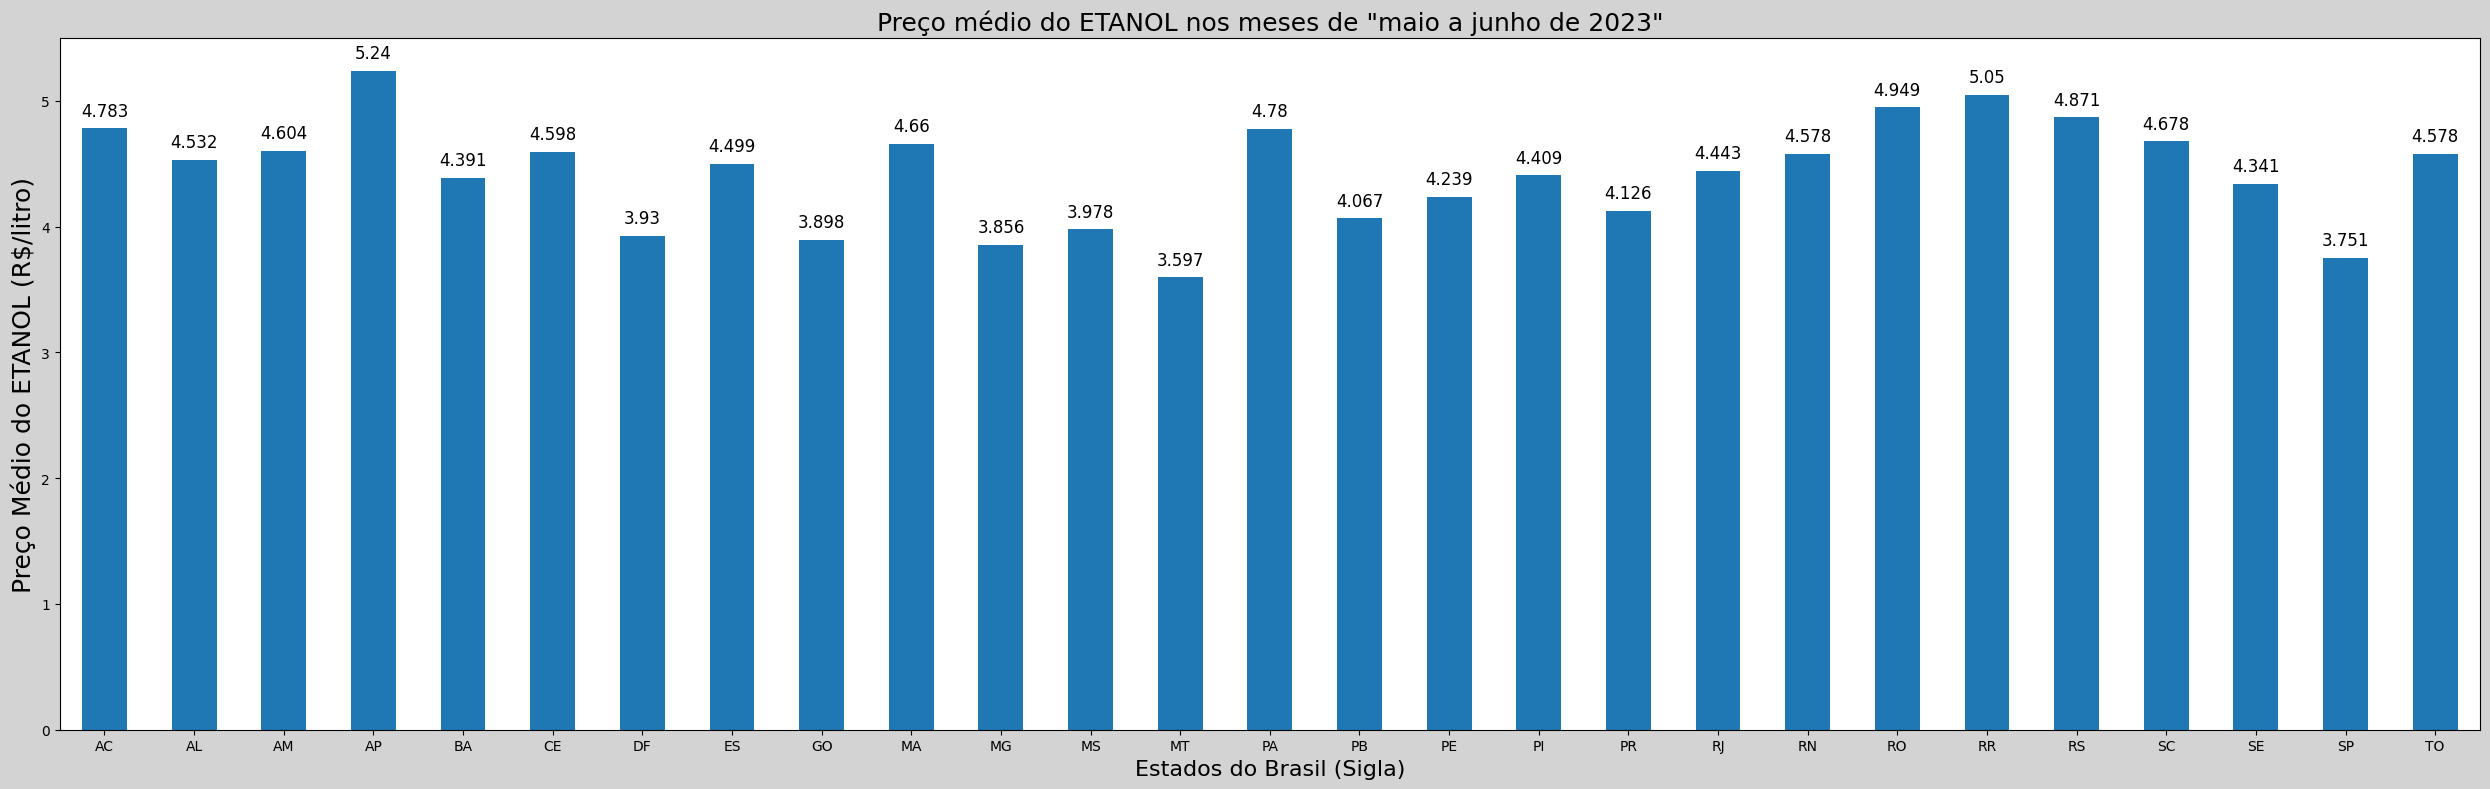

In [19]:
preco_etanol = df[df['Produto'] == 'ETANOL'].groupby('Sigla_Estado')['Valor_de_Venda'].mean().round(3)
preco_etanol


fig, ax = plt.subplots(figsize=(25, 8))
preco_etanol.plot(kind='bar', rot=0 )

for idx , val in enumerate(preco_etanol):
    txt = f'{val}'
    y_coord = val + 0.1
    x_coord = idx # posição de cada barra pode ter um delocamento ex 0.15

    # Adicionar e formatar o texto acima da barra
    ax.text(x=x_coord, y=y_coord, s=txt, fontsize=12, ha='center')

plt.title('Preço médio do ETANOL nos meses de "maio a junho de 2023"', fontsize=18)
plt.xlabel('Estados do Brasil (Sigla)', fontsize=16)
plt.ylabel('Preço Médio do ETANOL (R$/litro)', fontsize=18)
plt.tight_layout()
fig.patch.set_facecolor('lightgray')
plt.show()

- **ETANOL**

- O Etanol nos estado de Amapá 5.24 e Roraima 5.05, tiveram os maiores preços médio para o produto nos meses de maio a junho de 2023, E São Paulo um dos menores

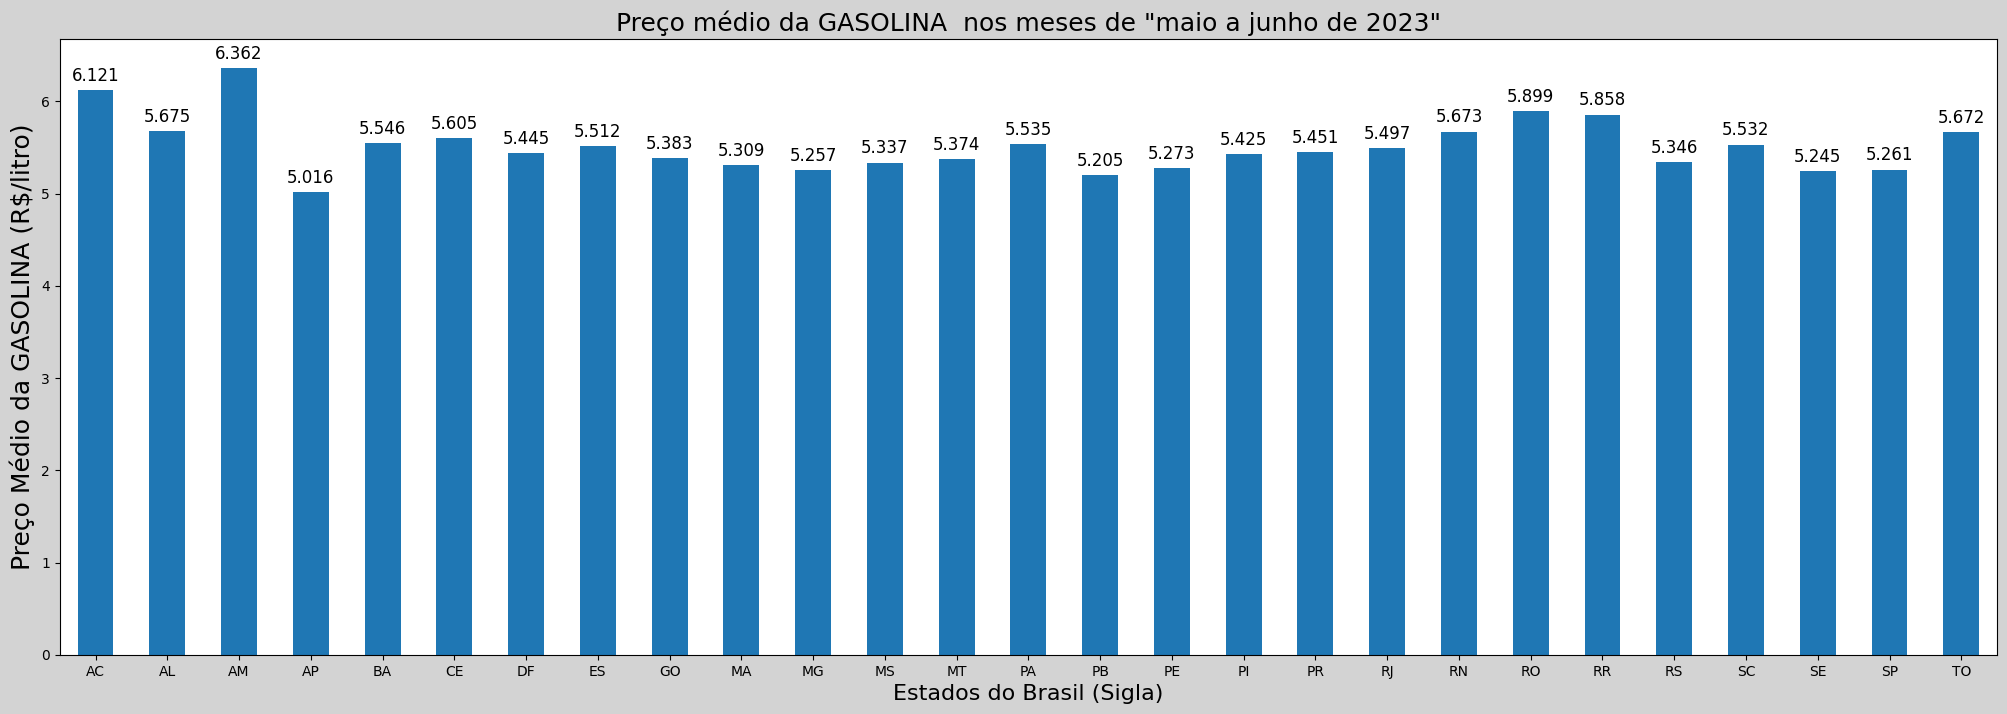

In [20]:
preco_gasolinac = df[df['Produto'] == 'GASOLINA'].groupby('Sigla_Estado')['Valor_de_Venda'].mean().round(3)
preco_gasolinac


fig, ax = plt.subplots(figsize=(25, 8))
preco_gasolinac.plot(kind='bar', rot=0 )

for idx , val in enumerate(preco_gasolinac):
    txt = f'{val}'
    y_coord = val + 0.1
    x_coord = idx # posição de cada barra pode ter um delocamento ex 0.15

    # Adicionar e formatar o texto acima da barra
    ax.text(x=x_coord, y=y_coord, s=txt, fontsize=12, ha='center')

plt.title('Preço médio da GASOLINA  nos meses de "maio a junho de 2023"', fontsize=18)
plt.xlabel('Estados do Brasil (Sigla)', fontsize=16)
plt.ylabel('Preço Médio da GASOLINA (R$/litro)', fontsize=18)
fig.patch.set_facecolor('lightgray')
plt.show()

- **GASOLINA COMUM**

- Preço médio da Gasolina comum nos meses de maio a junho de 2023, um dos estados que registraram o maior preço para a gasolina foi amazonas 6.362 seguido do acre 6.121

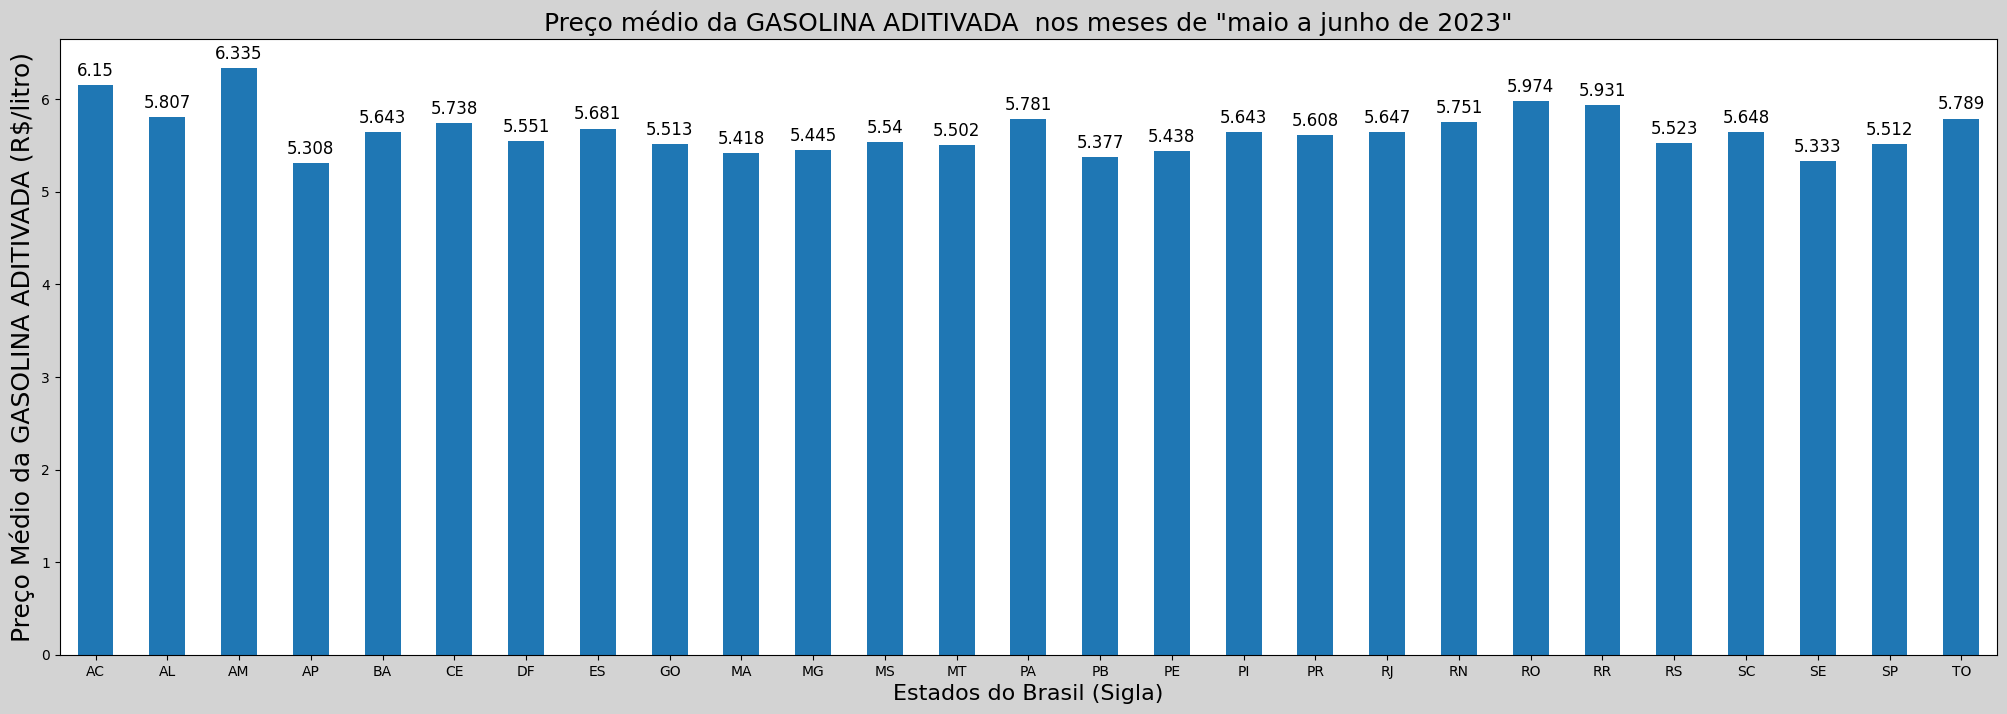

In [21]:
preco_gasolinaad = df[df['Produto'] == 'GASOLINA ADITIVADA'].groupby('Sigla_Estado')['Valor_de_Venda'].mean().round(3)
preco_gasolinaad

fig, ax = plt.subplots(figsize=(25, 8))
preco_gasolinaad.plot(kind='bar', rot=0 )

for idx , val in enumerate(preco_gasolinaad):
    txt = f'{val}'
    y_coord = val + 0.1
    x_coord = idx # posição de cada barra pode ter um delocamento ex 0.15

    # Adicionar e formatar o texto acima da barra
    ax.text(x=x_coord, y=y_coord, s=txt, fontsize=12, ha='center')

plt.title('Preço médio da GASOLINA ADITIVADA  nos meses de "maio a junho de 2023"', fontsize=18)
plt.xlabel('Estados do Brasil (Sigla)', fontsize=16)
plt.ylabel('Preço Médio da GASOLINA ADITIVADA (R$/litro)', fontsize=18)
fig.patch.set_facecolor('lightgray')
plt.show()

- **GASOLINA ADITIVADA**

- Gasolina Aditivada nos meses de maio a junho de 2023 no estado da Amazônia
indico o maior preço médio para o produto 6.335 seguido do Acre com 6.15

- Ao analisar os preços dos combustíveis nos diferentes Estados do Brasil notamos que Amapá, Roraima, Amazonas e Acre tiveram os maiores preços para os produtos nos meses de maio e junho de 2023, diversos fatores podem contribuir para o aumento dos preços do produto um é a distância dos estados para o estado com o maior número de produção dos combustíveis  do país, como São Paulo que é o maior produtor de Etanol, Teve um dos menores preços e é líder na produção de etanol segundo a (SEADE) Sistema Estadual de Análise de Dados (https://www.seade.gov.br/)

 <font size=6>5. Qual o município que possui o menor preço para a gasolina e para o etanol?

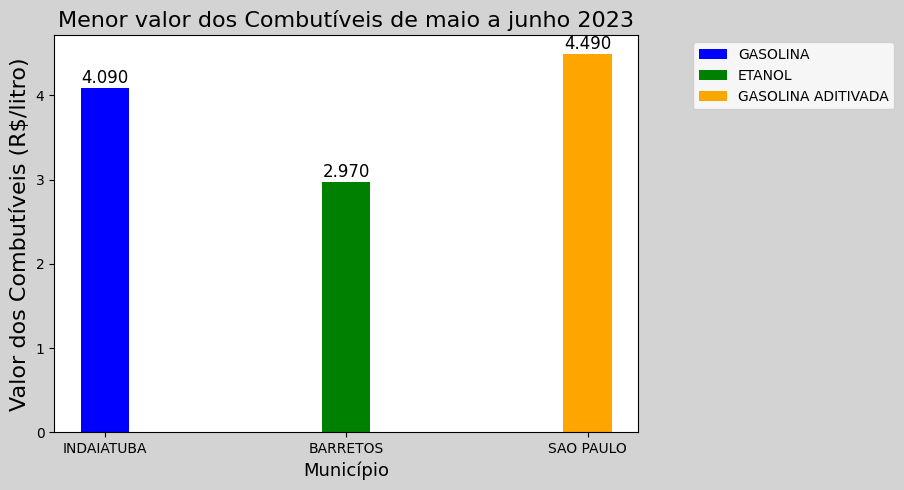

In [22]:
# gráficos
fig, ax = plt.subplots(figsize=(10, 5));

# legendas
plt.xlabel('Município', fontsize=13)
plt.ylabel('Valor dos Combutíveis (R$/litro)', fontsize=16)
plt.title('Menor valor dos Combutíveis de maio a junho 2023', fontsize=16)

#----------------------------------------------------------------------------------------------------------------------------------------------
# filtra menor valor para gasolina comun
menor_gasolinac = tabelas_preco_gasol_etan3[tabelas_preco_gasol_etan3['Produto'] == 'GASOLINA'].groupby('Municipio')['Valor_de_Venda'].min()

# pega o municipio com o menor valor e o menor valor
municipio_menor_valor = menor_gasolinac.idxmin()
valor_menor = menor_gasolinac.min()

# configuração da barra eixo x e eixo y
plt.bar(municipio_menor_valor, valor_menor, color='blue', width=0.2, label = 'GASOLINA')

# coloca o nome do municipio no eixo e e o valor acima do gráfico e suas configurações
plt.text(municipio_menor_valor, valor_menor + 0.01, f'{valor_menor:.3f}', ha='center', va='bottom', fontsize=12)


#--------------------------------------------------------------------------------------------------------------------------------------------------
# filtra menor valor para etanol comun
menor_etanol = tabelas_preco_gasol_etan3[tabelas_preco_gasol_etan3['Produto'] == 'ETANOL'].groupby('Municipio')['Valor_de_Venda'].min()

# pega o municipio com o menor valor e o menor valor
municipio_menor_valor1 = menor_etanol.idxmin()
valor_menor1 = menor_etanol.min()


# configuração da barra eixo x e eixo y
plt.bar(municipio_menor_valor1, valor_menor1, color='Green', width=0.2, label = 'ETANOL')


# coloca o nome do municipio no eixo e e o valor acima do gráfico e suas configurações
plt.text(municipio_menor_valor1, valor_menor1 + 0.01, f'{valor_menor1:.3f}', ha='center', va='bottom', fontsize=12)

#---------------------------------------------------------------------------------------------------------------------------------------------------

menor_gasolina_adit= tabelas_preco_gasol_etan3[tabelas_preco_gasol_etan3['Produto'] == 'GASOLINA ADITIVADA'].groupby('Municipio')['Valor_de_Venda'].min()
municipio_menor_valor2 = menor_gasolina_adit.idxmin()
valor_menor2 = menor_gasolina_adit.min()

# configuração da barra eixo x e eixo y
plt.bar(municipio_menor_valor2, valor_menor2, color='Orange', width=0.2, label = 'GASOLINA ADITIVADA')


# coloca o nome do municipio no eixo e e o valor acima do gráfico e suas configurações
plt.text(municipio_menor_valor2, valor_menor2 + 0.01, f'{valor_menor2:.3f}', ha='center', va='bottom', fontsize=12)
#---------------------------------------------------------------------------------------------------------------------------------------------------

# legenda e suas configurações
plt.legend(ncol=1, loc='upper right', bbox_to_anchor=(1.45, 1))
fig.patch.set_facecolor('lightgray')
# organiza os nomes graficos do layout
plt.tight_layout()
# tira a legenda automática e exibe o gráfico
plt.show()

- **Municípios com os menores preços**

- Os municípios com os menores preços para cada combustível, entre eles estão Indaiatuba(SP) com a Gasolina de 4.090 Barretos(SP) como o Etanol de 2.970 e São Paulo(SP) com Gasolina Aditivada de 4.490 o  estado de São Paulo é o maior produtor de Etanol, com a maior Refinaria, a Refinaria de Paulínia (Replan) em capacidade de processamento de petróleo 69 mil m³/dia equivalente a 434 mil barris que é 20% de todo o refino de petróleo na Brasil, fonte (https://petrobras.com.br/)

<font size=6>6. Qual o município que possui o maior preço para a gasolina e para o etanol?

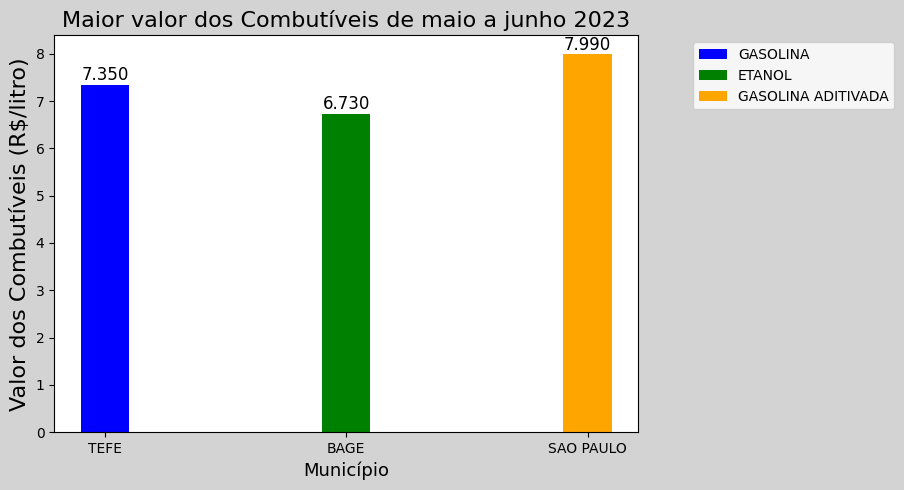

In [23]:
#gráficos
fig, ax = plt.subplots(figsize=(10, 5));

# legendas
plt.xlabel('Município', fontsize=13)
plt.ylabel('Valor dos Combutíveis (R$/litro)', fontsize=16)
plt.title('Maior valor dos Combutíveis de maio a junho 2023', fontsize=16)

#----------------------------------------------------------------------------------------------------------------------------------------------
# filtra maior valor para gasolina comun
maior_gasolinac = tabelas_preco_gasol_etan3[tabelas_preco_gasol_etan3['Produto'] == 'GASOLINA'].groupby('Municipio')['Valor_de_Venda'].max()

# pegar o municipio com o maior valor e o maior valor  menor
municipio_maior_valor = maior_gasolinac.idxmax()
valor_maior = maior_gasolinac.max()

# configuração da barra eixo x e eixo y
plt.bar(municipio_maior_valor, valor_maior, color='blue', width=0.2, label = 'GASOLINA')

# coloca o nome do municipio no eixo e e o valor acima do gráfico e suas configurações
plt.text(municipio_maior_valor, valor_maior + 0.01, f'{valor_maior:.3f}', ha='center', va='bottom', fontsize=12)


#--------------------------------------------------------------------------------------------------------------------------------------------------
# filtra maior valor para etanol aditivada comun
maior_etanol = tabelas_preco_gasol_etan3[tabelas_preco_gasol_etan3['Produto'] == 'ETANOL'].groupby('Municipio')['Valor_de_Venda'].max()

# pegar o municipio com o maior valor e o maior valor  menor
municipio_maior_valor1 = maior_etanol.idxmax()
valor_maior1 = maior_etanol.max()


# configuração da barra eixo x e eixo y
plt.bar(municipio_maior_valor1, valor_maior1, color='Green', width=0.2, label = 'ETANOL')


# coloca o nome do municipio no eixo e e o valor acima do gráfico e suas configurações
plt.text(municipio_maior_valor1, valor_maior1 + 0.01, f'{valor_maior1:.3f}', ha='center', va='bottom', fontsize=12)

#---------------------------------------------------------------------------------------------------------------------------------------------------
# filtra maior valor para gasolina aditivada comun
maior_gasolina_adit= tabelas_preco_gasol_etan3[tabelas_preco_gasol_etan3['Produto'] == 'GASOLINA ADITIVADA'].groupby('Municipio')['Valor_de_Venda'].max()

# pegar o municipio com o maior valor e o maior valor  menor
municipio_maior_valor2 = maior_gasolina_adit.idxmax()
valor_maior2 = maior_gasolina_adit.max()

# configuração da barra eixo x e eixo y
plt.bar(municipio_maior_valor2, valor_maior2, color='Orange', width=0.2, label = 'GASOLINA ADITIVADA')


# coloca o nome do municipio no eixo e e o valor acima do gráfico e suas configurações
plt.text(municipio_maior_valor2, valor_maior2 + 0.01, f'{valor_maior2:.3f}', ha='center', va='bottom', fontsize=12)
#-------------------------------------------------------------------------------------------------------------------------------------------------------

# legenda e suas configurações
plt.legend(ncol=1, loc='upper right', bbox_to_anchor=(1.45, 1))

# organiza os nomes e graficos do layout
plt.tight_layout()
fig.patch.set_facecolor('lightgray')
# tira a legenda automática e exibe o gráfico
plt.show()

- **Municípios com os maiores preços**

- Os municípios com os maiores preços para os combustíveis são Tefé (AM) com 7.350 R$ para Gasolina, Bagé (RS) com 6.730 para o Etanol e São paulo com 7.990 para a Gasolina Aditivada
- A diversos fatores que pode influenciar nos preços dos combustíveis nos municípios, um deles e ser um ponto turístico como o caso de Bagé no Rio Grande do Sul, com diverso evento como leilões de cavalos da raça "puro-sangue inglês" e a Festa Internacional do Churrasco, a maior festa deste tipo no Brasil, por onde circulam cerca de 60 000 pessoas (https://pt.wikipedia.org/wiki/Bagé)
- Outro fator pode ser o bairro, como São Paulo(SP) que registro 7.990, um dos maiores preços para Gasolina Aditivada no bairro de Vila Clementino, um bairro nobre localizado na zona sul da cidade de São Paulo, próximo ao Parque do Ibirapuera onde os maiores preços foram registrados na segunda-feira em ambos os meses
- Já no bairro de Jaguaré é um distrito situado na zona oeste do município de São Paulo foi registrado um dos menores 4.490 o bairro e constituído a maioria por classe média

<font size=6> 7. Qual a região que possui o maior valor médio da gasolina?

* Gasolina C

O valor médio da gasolina, é maior na região Norte. Tendo valor de R$ 5,779(aproximado).

Enquanto a região Sudeste tem a gasolina mais barata. Com média de R$5,308(aproximado).

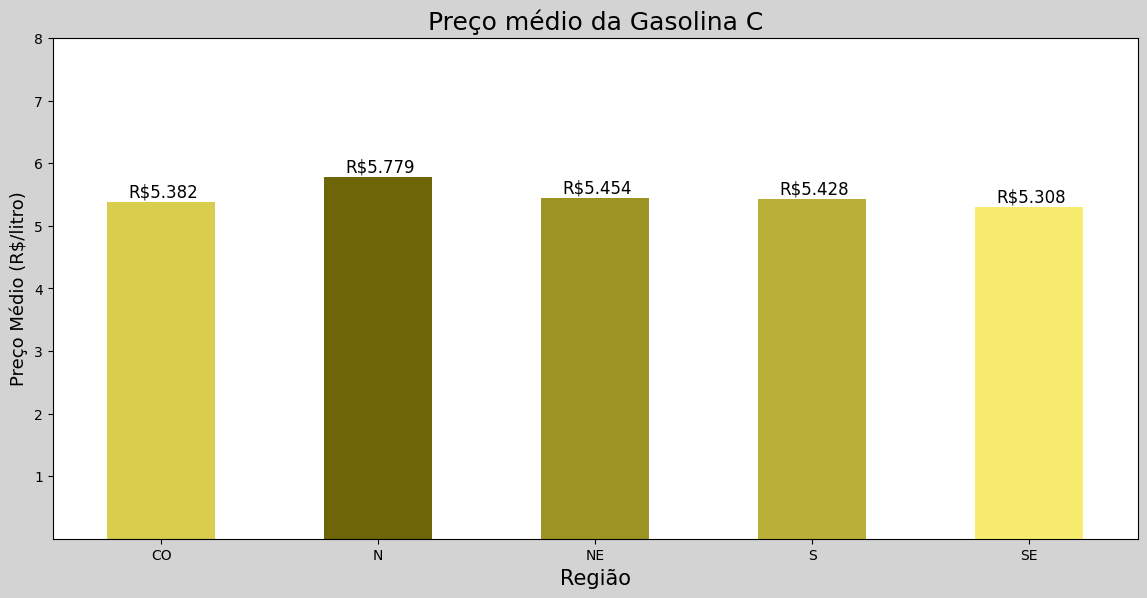

In [24]:
# Extraindo somente os resultados para gasolina.
# Verificando ovalor médio por região para a 'Gasolina' e mostrar o resultado.
media_regiao = df[df['Produto'] == 'GASOLINA'].groupby('Sigla_Regiao')['Valor_de_Venda'].mean().round(3)
media_regiao

# Usando o Matplotlib para plotar o gráfico.
fig, ax = plt.subplots(figsize=(14, 6.5))
media_regiao.plot(kind='bar', rot=0, color=['#D9CD4E','#6E6509','#9D9325','#BAAF37','#F8EC6F'] )

# Adicionando valores no topo das barras.
for idx , val in enumerate(media_regiao):
    txt = f'R${val}'
    y_coord = val + 0.08
    x_coord = idx - 0.15
    ax.text(x=x_coord, y=y_coord, s=txt, fontsize=12)

plt.title('Preço médio da Gasolina C', fontsize=18)
plt.xlabel('Região', fontsize=15)
plt.ylabel('Preço Médio (R$/litro)', fontsize=13)
plt.yticks([1,2,3,4,5,6,7,8])
fig.patch.set_facecolor('lightgray')


plt.show()

* Gasolina Aditivada

Obtemos o resultado da gasolina aditivada, também com maior valor médio na região Norte. Tendo seu valor de R$ 5,946(aproximado).

Já a região Centro Oeste conta com a gasolina mais barata. Com média de R$ 5,524(aproximado).

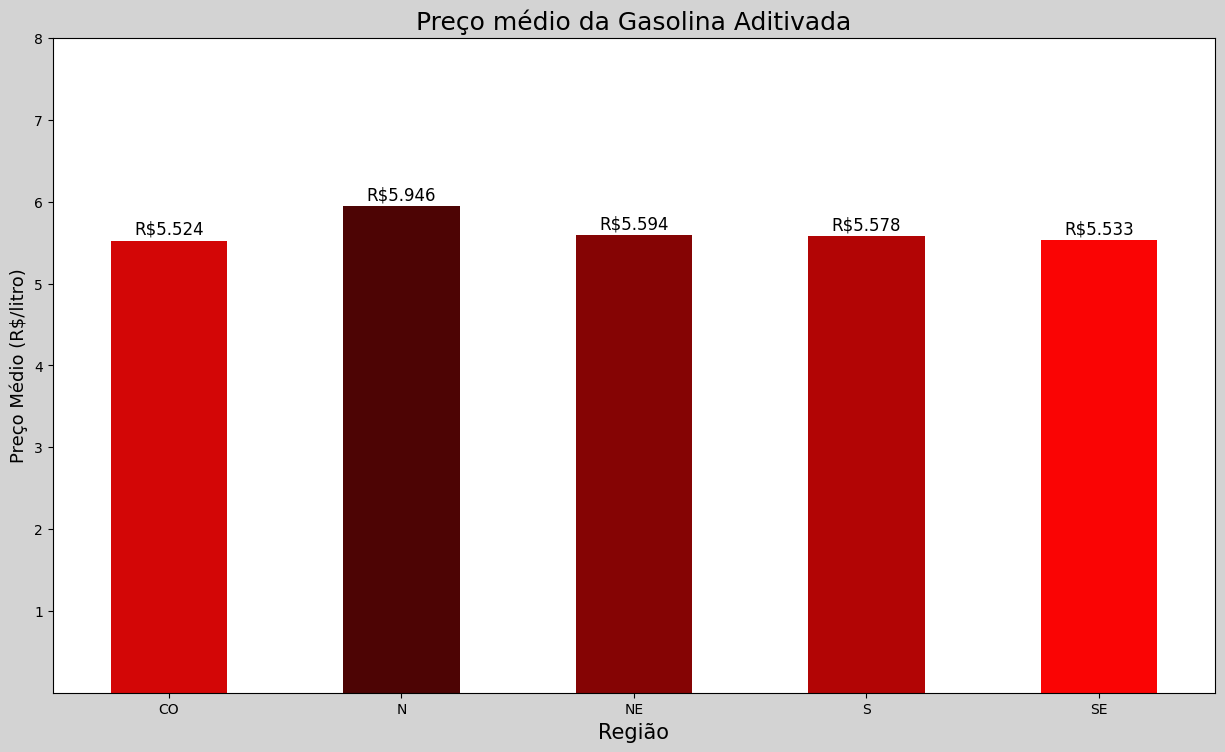

In [25]:
# Extraindo somente os resultados para gasolina aditivada.
# Verificando ovalor médio por região para a 'Gasolina Aditivada' e mostrar o resultado.
media_regiao = df[df['Produto'] == 'GASOLINA ADITIVADA'].groupby('Sigla_Regiao')['Valor_de_Venda'].mean().round(3)
media_regiao

# Usando o Matplotlib para plotar o gráfico.
fig, ax = plt.subplots(figsize=(15, 8.5))
media_regiao.plot(kind='bar', rot=0, color=['#D30606','#4d0404','#850404','#B20505','#Fa0404'] )

# Adicionando valores no topo das barras.
for idx , val in enumerate(media_regiao):
    txt = f'R${val}'
    y_coord = val + 0.08
    x_coord = idx - 0.15
    ax.text(x=x_coord, y=y_coord, s=txt, fontsize=12)

plt.title('Preço médio da Gasolina Aditivada', fontsize=18)
plt.xlabel('Região', fontsize=15)
plt.ylabel('Preço Médio (R$/litro)', fontsize=13)
plt.yticks([1,2,3,4,5,6,7,8])
fig.patch.set_facecolor('lightgray')

plt.show()

<font size=6> 8. Qual a região que possui o menor valor médio do etanol?

* Etanol

A região Centro Oeste representa o menor valor médio do Etanol. Com valor de R$ 3,861(aproximado).

Em contra partida o combustível esteve mais caro na região Norte. Com média de R$ 4,718(aproximado).

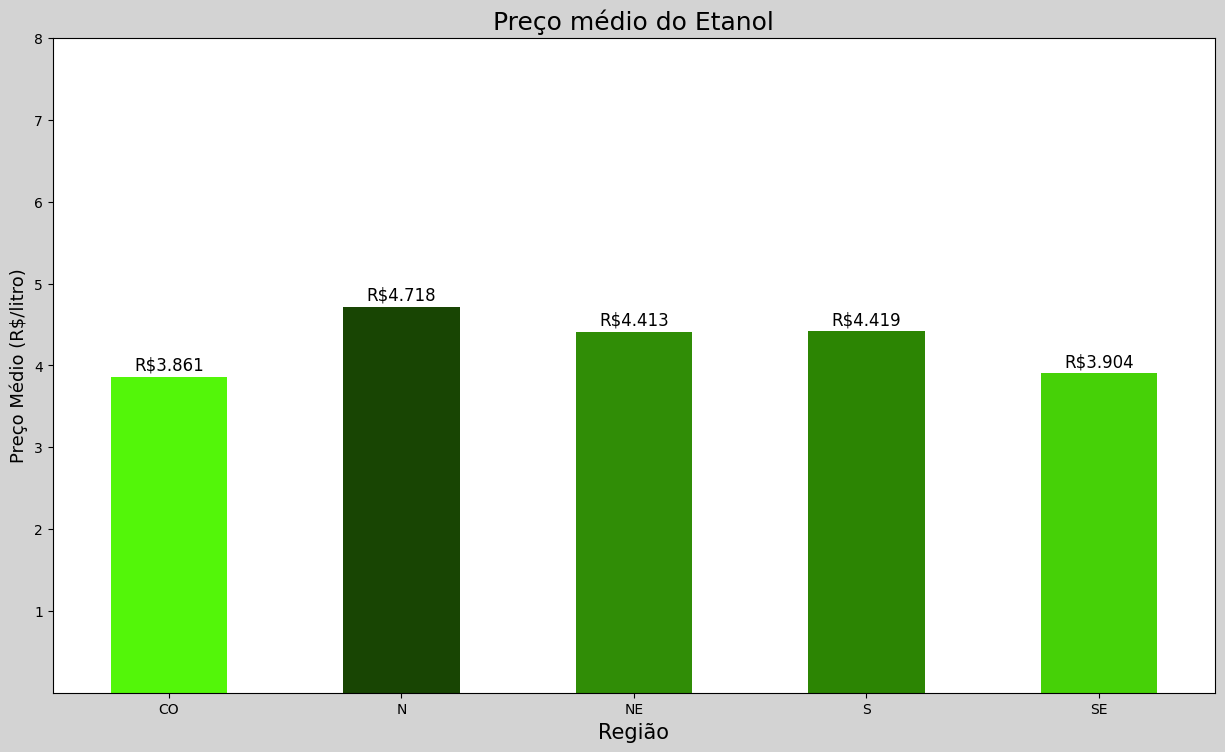

In [26]:
# Extraindo somente os resultados do Etanol.
# Verificando o valor médio por região para o 'Etanol' e mostrar o resultado.
media_regiao = df[df['Produto'] == 'ETANOL'].groupby('Sigla_Regiao')['Valor_de_Venda'].mean().round(3)
media_regiao

# Usando o Matplotlib para plotar o gráfico.
fig, ax = plt.subplots(figsize=(15, 8.5), label='Média referente aos Meses Maio e Junho')
media_regiao.plot(kind='bar', rot=0, color=['#53f609','#184503','#308d06','#2c8503','#46d107'] )

# Adicionando valores no topo das barras.
for idx , val in enumerate(media_regiao):
    txt = f'R${val}'
    y_coord = val + 0.08
    x_coord = idx - 0.15
    ax.text(x=x_coord, y=y_coord, s=txt, fontsize=12)

plt.title('Preço médio do Etanol', fontsize=18)
plt.xlabel('Região', fontsize=15)
plt.ylabel('Preço Médio (R$/litro)', fontsize=13)
plt.yticks([1,2,3,4,5,6,7,8])
fig.patch.set_facecolor('lightgray')

plt.show()

<font size=6>Pergunta extra 2. Qual a Bandeira que possui o maior preço para a gasolina e para o etanol?

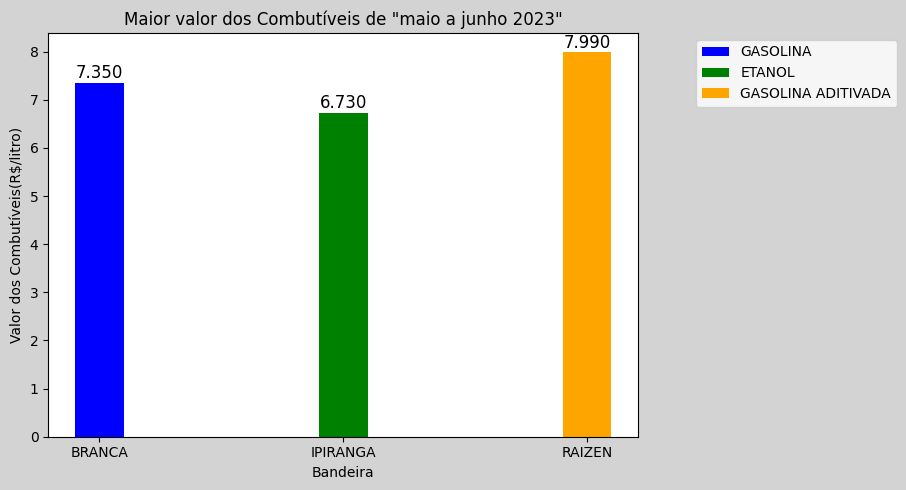

In [27]:
# gráficos
fig, ax = plt.subplots(figsize=(10, 5));

# legendas
plt.xlabel('Bandeira')
plt.ylabel('Valor dos Combutíveis(R$/litro)')
plt.title('Maior valor dos Combutíveis de "maio a junho 2023"')

#----------------------------------------------------------------------------------------------------------------------------------------------
# filtra maior valor para gasolina comun
maior_gasolinac = df[df['Produto'] == 'GASOLINA'].groupby('Bandeira')['Valor_de_Venda'].max()

# pega a bandeira com o maior valor
bandeira_maior_valorb = maior_gasolinac.idxmax()
valor_maiorb = maior_gasolinac.max()

# configuração da barra eixo x e eixo y
plt.bar(bandeira_maior_valorb, valor_maiorb, color='blue', width=0.2, label = 'GASOLINA')

# coloca o nome da bandeira no eixo e e o valor acima do gráfico e suas configurações
plt.text(bandeira_maior_valorb, valor_maiorb + 0.01, f'{valor_maiorb:.3f}', ha='center', va='bottom', fontsize=12)


#--------------------------------------------------------------------------------------------------------------------------------------------------
# filtra maior valor para gasolina comun
maior_etanolb = df[df['Produto'] == 'ETANOL'].groupby('Bandeira')['Valor_de_Venda'].max()

# pega a bandeira com o maior valor
bandeira_maior_valor1b = maior_etanolb.idxmax()
valor_maior1b = maior_etanolb.max()


# configuração da barra eixo x e eixo y
plt.bar(bandeira_maior_valor1b, valor_maior1b, color='Green', width=0.2, label = 'ETANOL')


# coloca o nome do municipio no eixo e e o valor acima do gráfico e suas configurações
plt.text(bandeira_maior_valor1b, valor_maior1b + 0.01, f'{valor_maior1b:.3f}', ha='center', va='bottom', fontsize=12)

#---------------------------------------------------------------------------------------------------------------------------------------------------
# filtra maior valor para gasolina comun
maior_gasolina_aditb= df[df['Produto'] == 'GASOLINA ADITIVADA'].groupby('Bandeira')['Valor_de_Venda'].max()

# pega a bandeira com o maior valor
bandeira_maior_valor2b = maior_gasolina_aditb.idxmax()
valor_maior2b = maior_gasolina_aditb.max()

# configuração da barra eixo x e eixo y
plt.bar(bandeira_maior_valor2b, valor_maior2b, color='Orange', width=0.2, label = 'GASOLINA ADITIVADA')


# coloca o nome do municipio no eixo e e o valor acima do gráfico e suas configurações
plt.text(bandeira_maior_valor2b, valor_maior2b + 0.01, f'{valor_maior2b:.3f}', ha='center', va='bottom', fontsize=12)
#---------------------------------------------------------------------------------------------------------------------------------------------------

# legenda e suas configurações
plt.legend(ncol=1, loc='upper right', bbox_to_anchor=(1.45, 1))

fig.patch.set_facecolor('lightgray')
# organiza os nomes graficos do layout
plt.tight_layout()
# tira a legenda automática e exibe o gráfico
plt.show()

- **Bandeiras**

- Bandeiras com os maiores preços para cada combustível, Bandeira branca são postos sem bandeira que compra de grandes distribuidoras nos meses de maio a junho de 2023 a bandeira branca registro 7.350 na Gasolina comum, bandeira Ipiranga teve o maior valor para o Etanol de 6.730 e a bandeira Raizen com o valor de 7.990 para a Gasolina Aditivada

## **Conclusão:**

- Ao analisar os preços dos combustíveis nas regiões do país foram identificados diversos fatores para aumento ou queda dos preços dos combustíveis, como localidade de bairros nobre para de baixa renda, localização do município que dificulta a logística e municípios de pontos turísticos
- O monitoramento dos preços dos combustíveis são importante para a economia do país por que reflete diretamente o no bolso do cidadão brasileiro e com seu aumento pode influenciar preços de passagem, aumento dos custos de logística ocasionando preços de alimento mais altos e greves que dificulta o transporte pela região do país

## **Referências:**

- Site (https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis)
- Site (https://www.seade.gov.br/)
- Site (https://pt.wikipedia.org/wiki/Bagé)
- Site (https://pt.wikipedia.org/wiki/Vila_Clementino)
- Site (https://petrobras.com.br/pt/nossas-atividades/principais-operacoes/refinarias/refinaria-de-paulinia-replan.htm)
